In [21]:
import sys

sys.path.append("../../")
from src.dataset.utils.mapping import generate_mapping, generate_hierarchical_mapping
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from src.dataset.dbpedia import DBPediaDataset

In [28]:
dataset = torch.load("sampled_dataset.pt")
labels = dataset["class"]
unique_labels = np.unique(labels)

/tmp/ipykernel_3174678/614737635.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load("sampled_dataset.pt")


In [30]:
len(dataset)

36891

In [31]:
with open("split/train_indices.txt", "r") as f:
    train_size = len(f.readlines())

with open("split/val_indices.txt", "r") as f:
    val_size = len(f.readlines())

with open("split/test_indices.txt", "r") as f:

    test_size = len(f.readlines())

print(f"Train size: {train_size}")
print(f"Val size: {val_size}")
print(f"Test size: {test_size}")

Train size: 25823
Val size: 5534
Test size: 5534


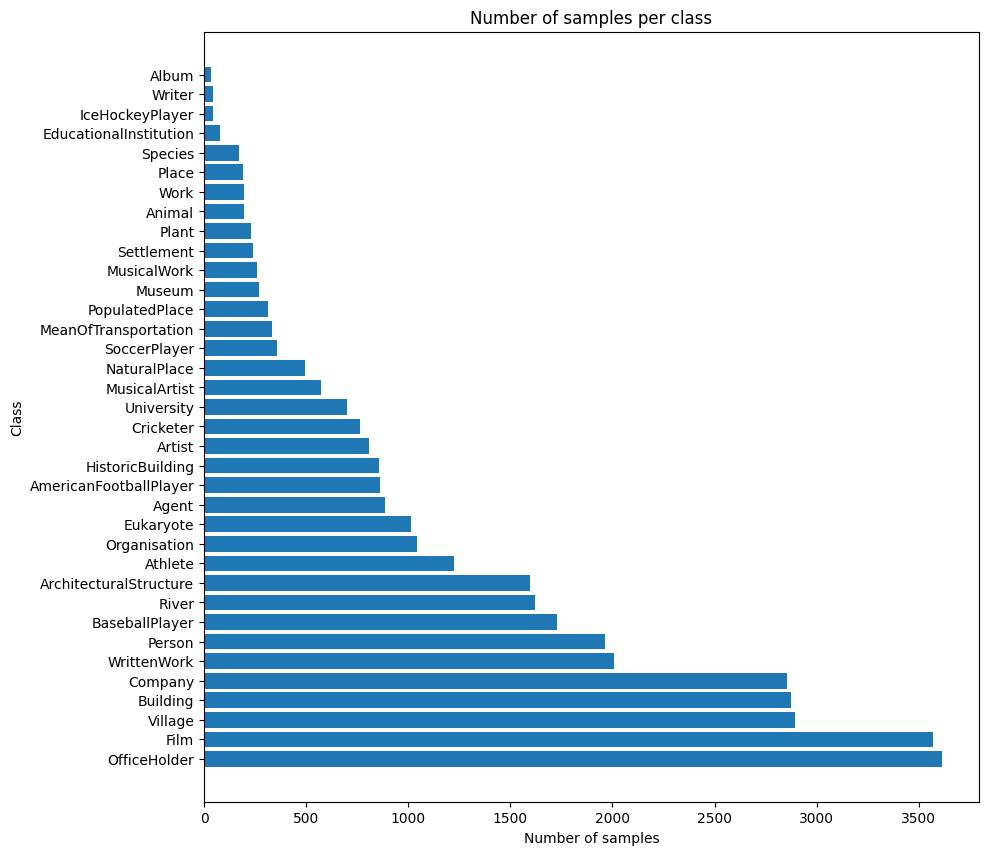

In [29]:
samples_per_class = {k: 0 for k in unique_labels}
for label in labels:
    samples_per_class[label] += 1

# Create ranked dataframes
sorted_samples_per_class = sorted(
    samples_per_class.items(), key=lambda x: x[1], reverse=True
)
sorted_classes = [x[0] for x in sorted_samples_per_class]
sorted_classes = [x.split("/")[-1] for x in sorted_classes]
sorted_samples = [x[1] for x in sorted_samples_per_class]

# Plot
plt.figure(figsize=(10, 10))
plt.barh(sorted_classes, sorted_samples)
plt.xlabel("Number of samples")
plt.ylabel("Class")
plt.title("Number of samples per class")
plt.show()

Text(0, 0.5, 'Cumulative sum of samples')

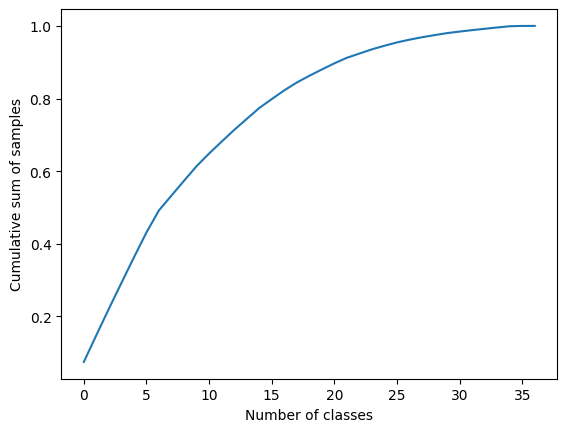

In [ ]:
# Plot cumulative sum of samples
cumulative_samples = np.cumsum(sorted_samples) / len(entities)
plt.plot(cumulative_samples)
plt.grid()
plt.xlabel("Number of classes")
# Line at 80% of the samples
plt.axhline(y=0.8, color="r", linestyle="--")
# X line at 80% of the classes
plt.axvline(x=np.where(cumulative_samples > 0.8)[0][0], color="r", linestyle="--")
plt.ylabel("Cumulative sum of samples")